In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, UpSampling2D

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

Visualizing the data

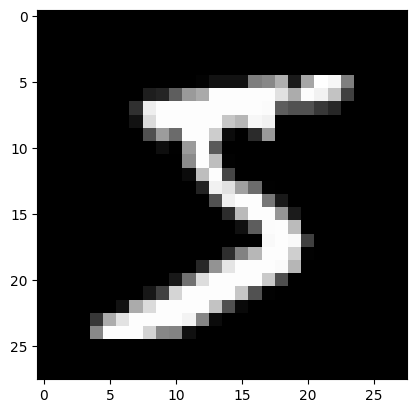

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'gray')

Normalizaing the dataset

In [7]:
X_train = X_train / 255
X_test = X_test / 255

Converting data into 3 dimensional vector as con2D layer takes input in 3 dimension

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1 )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1 )

Building our model

In [28]:
input_layer = Input(shape = (28, 28, 1))

Encoder

In [29]:
x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_layer)
x = MaxPool2D(pool_size=(2, 2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPool2D(pool_size=(2, 2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
encoded = MaxPool2D(pool_size=(2, 2), padding = 'same')(x)

Decoder

In [30]:
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(encoded)
#upsampling layer will upsample the number of parameters
#  by restoring values that maxpool eliminated
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3,3), activation = 'relu', )(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3,3), activation = 'relu', padding = 'same')(x)

In [31]:
model = Model(input_layer, decoded)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 8)           584 

In [33]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Here both input and output will be same i.e X_train
history = model.fit(X_train, X_train, epochs = 50, batch_size = 128, validation_data = (X_test, X_test))

Creating separate encoder decoder model for testing

In [35]:
# encoder model
encoder = Model(input_layer, encoded)
encoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 8)           584 

In [39]:
# To create the decoder layer
# first initializa its input shape which is the output of encoder layer
decoder_layer = Input(shape = (4, 4, 8))
# model.layers[7] is conv2D_24 layer. From this layer every layer is part of the decoder
decoder = model.layers[7](decoder_layer)
for layer in model.layers[8:]:
  decoder = layer(decoder)
decoder = Model(decoder_layer, decoder)
decoder.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d_9 (UpSampling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 16)        1168

Encoding our test data first

In [40]:
encoded_image = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [41]:
encoded_image.shape

(10000, 4, 4, 8)

Using decoder to reconstruct our test data

In [42]:
decoded_image = decoder.predict(encoded_image)

313/313 [==============================] - 1s 3ms/step


In [43]:
decoded_image.shape

(10000, 28, 28, 1)

Visualing the reconstructed data

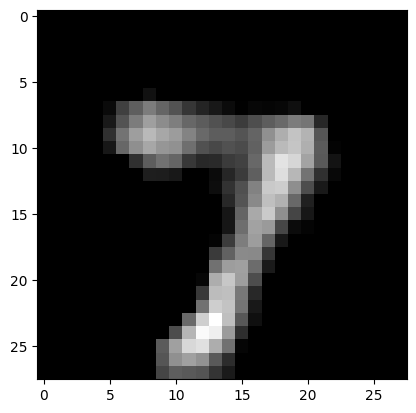

In [47]:
# converting to 2 dimension
decoded_image = decoded_image.reshape(decoded_image.shape[0], 28, 28)
plt.imshow(decoded_image[0], cmap = 'gray')

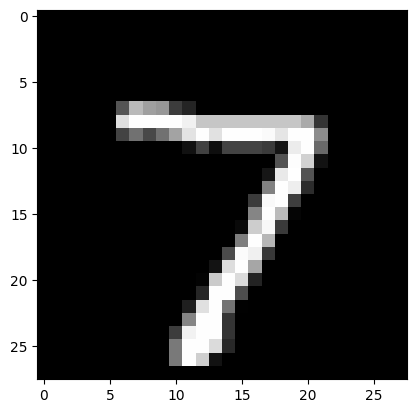

In [49]:
X_test = X_test.reshape(X_test.shape[0], 28,28)
plt.imshow(X_test[0], cmap = 'gray')

The reconstruted image is blurry as during reconstruction it looses some details